In [1]:
# DS Libraries
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# knn submodules from scikit learn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,\
plot_confusion_matrix, precision_score, recall_score

import prepare
import warnings
warnings.filterwarnings('ignore')

In [2]:
train, validate, test = prepare.wrangle_data('titanic')

In [3]:
X_cols = train.drop(columns=['survived','sex','embark_town']).columns.to_list()
y_col = 'survived'

In [4]:
train.survived.mode()

0    0
Name: survived, dtype: int64

In [5]:
# establish a baseline
baseline_preds = (train.survived == 0).mean()
baseline_preds

0.6164658634538153

## 1.
Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [6]:
X_train = train[X_cols]
y_train = train[y_col]
X_val = validate[X_cols]
y_val = validate[y_col]
X_test = test[X_cols]
y_test = test[y_col]

In [7]:
# create the knn object
knn_5 = KNeighborsClassifier()
# fit the knn object
knn_5.fit(X_train, y_train)
# predict using the knn object
knn_5_pred = knn_5.predict(X_train)

## 2.
Evaluate your results using the model score, confusion matrix, and classification report.

In [8]:
# knn_5 score
print(f'accuracy for n_neighbors=5 is: {knn_5.score(X_train, y_train):.2%}\n')

# confusion matrix for knn_5
print(f'confusion matrix for n_neighbors=5: \n{confusion_matrix(y_train, knn_5_pred)}\n')

# classification report for knn_5
print(f'classification report for n_neighbors=5:\n\n \
{classification_report(y_train, knn_5_pred)}')

accuracy for n_neighbors=5 is: 79.12%

confusion matrix for n_neighbors=5: 
[[266  41]
 [ 63 128]]

classification report for n_neighbors=5:

               precision    recall  f1-score   support

           0       0.81      0.87      0.84       307
           1       0.76      0.67      0.71       191

    accuracy                           0.79       498
   macro avg       0.78      0.77      0.77       498
weighted avg       0.79      0.79      0.79       498



## 3. 
Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [9]:
# get the true pos, true neg, false pos and false neg numbers using a confusion matrix
conf = confusion_matrix(y_train, knn_5_pred)
TN, FP, FN, TP = conf.ravel()

# calculate rate metrics
accuracy= (TP + TN) / (TP + TN + FP + FN)
TPR = recall = TP / (TP + FN)
FPR= FP / (FP + TN)
TNR= TN / (FP + TN)
FNR= FN / (FN + TP)
precision= TP / (TP + FP)
F1= 2 * (precision * recall) / (precision + recall)
support= TP + FN, TN + FP

# print the prediction rate metrics
print(f'accuracy for n_neighbors=5: \t\t{accuracy:.2%}')
print(f'true positives rate for n_neighbors=5: \t{TPR:.2%}')
print(f'false positives rate for n_neighbors=5:\t{FPR:.2%}')
print(f'true negatives rate for n_neighbors=5: \t{TNR:.2%}')
print(f'false negatives rate for n_neighbors=5:\t{FNR:.2%}')
print(f'precision for n_neighbors=5: \t\t{precision:.2%}')
print(f'recall for n_neighbors=5: \t\t{recall:.2%}')
print(f'f1_score for n_neighbors=5: \t\t{F1:.2%}')
print(f'support for n_neighbors=5: \t\t{support}')

accuracy for n_neighbors=5: 		79.12%
true positives rate for n_neighbors=5: 	67.02%
false positives rate for n_neighbors=5:	13.36%
true negatives rate for n_neighbors=5: 	86.64%
false negatives rate for n_neighbors=5:	32.98%
precision for n_neighbors=5: 		75.74%
recall for n_neighbors=5: 		67.02%
f1_score for n_neighbors=5: 		71.11%
support for n_neighbors=5: 		(191, 307)


## 4.
Run through steps 1-3 setting k to 10

In [10]:
# create the knn object
knn_10 = KNeighborsClassifier(n_neighbors=10)
# fit the knn object
knn_10.fit(X_train, y_train)
# predict using the knn object
knn_10_pred = knn_10.predict(X_train)

In [11]:
# knn_10 score
print(f'accuracy for n_neighbors=10 is: {knn_10.score(X_train, y_train):.2%}\n')

# confusion matrix for knn_10
print(f'confusion matrix for n_neighbors=10: \n{confusion_matrix(y_train, knn_10_pred)}\n')

# classification report for knn_10
print(f'classification report for n_neighbors=10:\n\n \
{classification_report(y_train, knn_10_pred)}')

accuracy for n_neighbors=10 is: 73.90%

confusion matrix for n_neighbors=10: 
[[272  35]
 [ 95  96]]

classification report for n_neighbors=10:

               precision    recall  f1-score   support

           0       0.74      0.89      0.81       307
           1       0.73      0.50      0.60       191

    accuracy                           0.74       498
   macro avg       0.74      0.69      0.70       498
weighted avg       0.74      0.74      0.73       498



In [17]:
# get the true pos, true neg, false pos and false neg numbers using a confusion matrix
conf = confusion_matrix(y_train, knn_10_pred)
TN, FP, FN, TP = conf.ravel()

accuracy= (TP + TN) / (TP + TN + FP + FN)
TPR = recall = TP / (TP + FN)
FPR= FP / (FP + TN)
TNR= TN / (FP + TN)
FNR= FN / (FN + TP)
precision= TP / (TP + FP)
F1= 2 * (precision * recall) / (precision + recall)
support= TP + FN, TN + FP

print(f'accuracy for n_neighbors=10: \t\t\t{accuracy:.2%}')
print(f'true positives rate for n_neighbors=10: \t{TPR:.2%}')
print(f'false positives rate for n_neighbors=10:\t{FPR:.2%}')
print(f'true negatives rate for n_neighbors=10: \t{TNR:.2%}')
print(f'false negatives rate for n_neighbors=10:\t{FNR:.2%}')
print(f'precision for n_neighbors=10: \t\t\t{precision:.2%}')
print(f'recall for n_neighbors=10: \t\t\t{recall:.2%}')
print(f'f1_score for n_neighbors=10: \t\t\t{F1:.2%}')
print(f'support for n_neighbors=10: \t\t\t{support}')

accuracy for n_neighbors=10: 			73.90%
true positives rate for n_neighbors=10: 	50.26%
false positives rate for n_neighbors=10:	11.40%
true negatives rate for n_neighbors=10: 	88.60%
false negatives rate for n_neighbors=10:	49.74%
precision for n_neighbors=10: 			73.28%
recall for n_neighbors=10: 			50.26%
f1_score for n_neighbors=10: 			59.63%
support for n_neighbors=10: 			(191, 307)


## 5.
Run through steps 1-3 setting k to 20



In [18]:
# create the knn object
knn_20 = KNeighborsClassifier(n_neighbors=20)
# fit the knn object
knn_20.fit(X_train, y_train)
# predict using the knn object
knn_20_pred = knn_20.predict(X_train)

In [19]:
# knn_20 score
print(f'accuracy for n_neighbors=20 is: {knn_20.score(X_train, y_train):.2%}\n')

# confusion matrix for knn_20
print(f'confusion matrix for n_neighbors=20: \n{confusion_matrix(y_train, knn_20_pred)}\n')

# classification report for knn_20
print(f'classification report for n_neighbors=20:\n\n \
{classification_report(y_train, knn_20_pred)}')

accuracy for n_neighbors=20 is: 73.29%

confusion matrix for n_neighbors=20: 
[[269  38]
 [ 95  96]]

classification report for n_neighbors=20:

               precision    recall  f1-score   support

           0       0.74      0.88      0.80       307
           1       0.72      0.50      0.59       191

    accuracy                           0.73       498
   macro avg       0.73      0.69      0.70       498
weighted avg       0.73      0.73      0.72       498



In [20]:
# get the true pos, true neg, false pos and false neg numbers using a confusion matrix
conf = confusion_matrix(y_train, knn_20_pred)
TN, FP, FN, TP = conf.ravel()

accuracy= (TP + TN) / (TP + TN + FP + FN)
TPR = recall = TP / (TP + FN)
FPR= FP / (FP + TN)
TNR= TN / (FP + TN)
FNR= FN / (FN + TP)
precision= TP / (TP + FP)
F1= 2 * (precision * recall) / (precision + recall)
support= TP + FN, TN + FP

print(f'accuracy for n_neighbors=20: \t\t\t{accuracy:.2%}')
print(f'true positives rate for n_neighbors=20: \t{TPR:.2%}')
print(f'false positives rate for n_neighbors=20:\t{FPR:.2%}')
print(f'true negatives rate for n_neighbors=20: \t{TNR:.2%}')
print(f'false negatives rate for n_neighbors=20:\t{FNR:.2%}')
print(f'precision for n_neighbors=20: \t\t\t{precision:.2%}')
print(f'recall for n_neighbors=20: \t\t\t{recall:.2%}')
print(f'f1_score for n_neighbors=20: \t\t\t{F1:.2%}')
print(f'support for n_neighbors=20: \t\t\t{support}')

accuracy for n_neighbors=20: 			73.29%
true positives rate for n_neighbors=20: 	50.26%
false positives rate for n_neighbors=20:	12.38%
true negatives rate for n_neighbors=20: 	87.62%
false negatives rate for n_neighbors=20:	49.74%
precision for n_neighbors=20: 			71.64%
recall for n_neighbors=20: 			50.26%
f1_score for n_neighbors=20: 			59.08%
support for n_neighbors=20: 			(191, 307)


## Bonus
Lets instead go from 1 to 20

In [13]:
knn_model_dict = {}
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_model_dict[f'n_neighbors_{i}'] = {}
    knn_model_dict[f'n_neighbors_{i}']['model'] = knn
    knn_model_dict[f'n_neighbors_{i}']['train_score'] = knn.score(X_train, y_train)
    knn_model_dict[f'n_neighbors_{i}']['val_score'] = knn.score(X_val, y_val)
    knn_model_dict[f'n_neighbors_{i}']['score_diff'] = \
        knn.score(X_train, y_train) - knn.score(X_val, y_val)
    knn_model_dict[f'n_neighbors_{i}']['train_precision'] = \
        precision_score(y_train, knn.predict(X_train))
    knn_model_dict[f'n_neighbors_{i}']['val_precision'] = \
        precision_score(y_val, knn.predict(X_val))
    knn_model_dict[f'n_neighbors_{i}']['train_recall'] = \
        recall_score(y_train, knn.predict(X_train))
    knn_model_dict[f'n_neighbors_{i}']['val_recall'] = \
        recall_score(y_val, knn.predict(X_val))

In [14]:
accuracy_df = pd.DataFrame(
 {
     'model':[model for model in knn_model_dict],
     'train_accuracy':[knn_model_dict[model]['train_score'] for model in knn_model_dict],
     'val_accuracy': [knn_model_dict[model]['val_score'] for model in knn_model_dict],
     'score_diff': [knn_model_dict[model]['score_diff'] for model in knn_model_dict],
     'train_precision': [knn_model_dict[model]['train_precision']\
                         for model in knn_model_dict],
     'val_precision': [knn_model_dict[model]['val_precision']\
                         for model in knn_model_dict],
     'train_recall': [knn_model_dict[model]['train_recall']\
                         for model in knn_model_dict],
     'val_recall': [knn_model_dict[model]['val_recall']\
                         for model in knn_model_dict]
 }
)

In [15]:
accuracy_df.set_index(accuracy_df.index + 1)

,model,train_accuracy,val_accuracy,score_diff,train_precision,val_precision,train_recall,val_recall
1,n_neighbors_1,0.991968,0.719626,0.272342,0.994709,0.644737,0.984293,0.597561
2,n_neighbors_2,0.847390,0.705607,0.141782,1.000000,0.686275,0.602094,0.426829
3,n_neighbors_3,0.823293,0.696262,0.127031,0.808383,0.613333,0.706806,0.560976
4,n_neighbors_4,0.799197,0.696262,0.102935,0.895652,0.666667,0.539267,0.414634
5,n_neighbors_5,0.791165,0.719626,0.071538,0.757396,0.661765,0.670157,0.548780
6,n_neighbors_6,0.765060,0.719626,0.045434,0.780303,0.703704,0.539267,0.463415
7,n_neighbors_7,0.779116,0.714953,0.064163,0.728814,0.661538,0.675393,0.524390
8,n_neighbors_8,0.765060,0.728972,0.036088,0.780303,0.700000,0.539267,0.512195
9,n_neighbors_9,0.761044,0.724299,0.036745,0.719512,0.666667,0.617801,0.560976
10,n_neighbors_10,0.738956,0.705607,0.033348,0.732824,0.686275,0.502618,0.426829


## 6.
What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

On only the training data, n_neighbors=1 had the highest accuracy score, the second highest precision score and the highest recall score.

## 7. 
Which model performs best on our out-of-sample data from validate?

When using the validate data, n_neighbors=16 was the best performer. It has the highest accuracy and one of the highest precision scores, but doesn't have a great recall score.

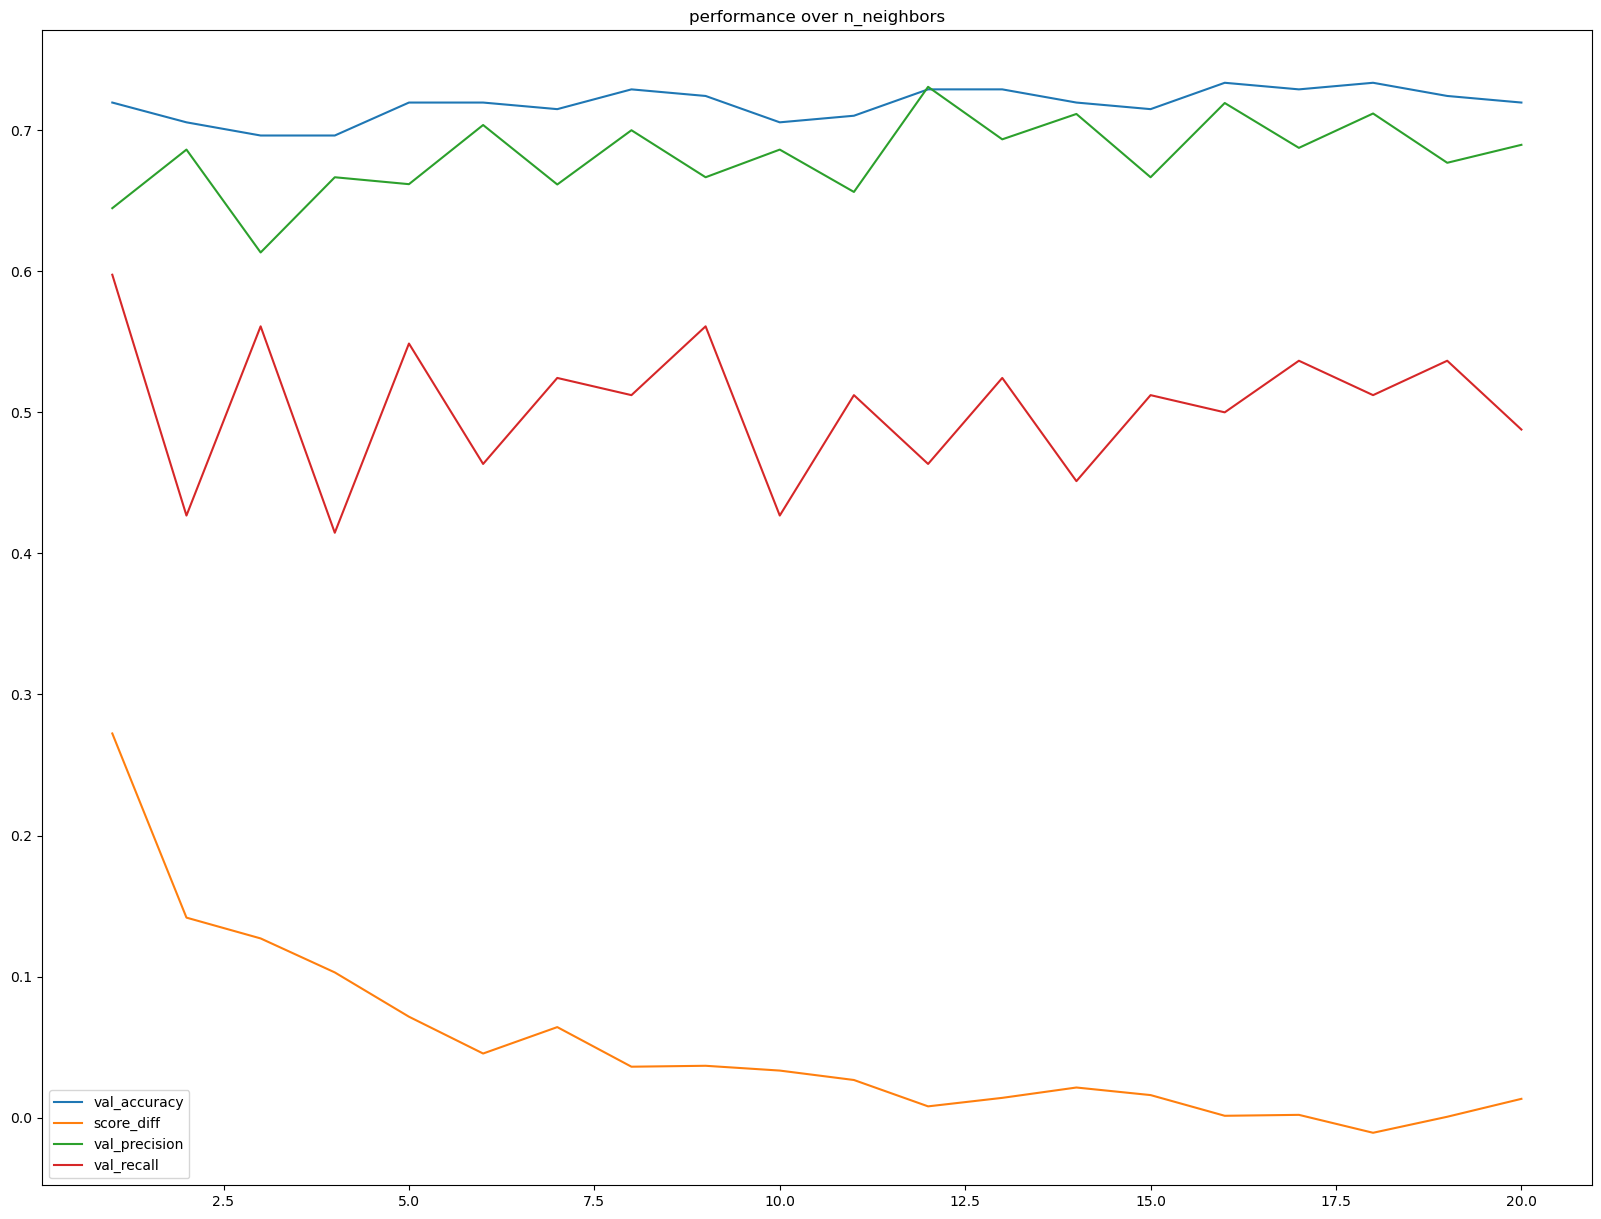

In [26]:
accuracy_df[['val_accuracy', 'score_diff', 'val_precision', 'val_recall']].set_index(accuracy_df.index + 1).plot(
    title='performance over n_neighbors', figsize=(20,15))
plt.show()